# Workshop week 2 - Math Basics and Linear regression 

## Environment Setting

Useful Tools for this course.

### 1. Conda Environment


### 2. Jupyter notebook


### 3. Numpy


### 4. Sckit-learn


## Matrix Operations in Numpy




Matrices are fundamental mathematical structures widely employed in various fields, including machine learning. They provide a concise and organized way to represent and process data. In the context of machine learning, matrices are used to represent datasets, where each row corresponds to an observation, and each column represents a feature or variable. Matrix operations, such as multiplication and transposition, play a crucial role in linear algebra, enabling transformations and manipulations of data. In linear regression, the relationship between features and target variables is expressed through matrix multiplication. Matrices are also integral to advanced techniques, such as principal component analysis (PCA) for dimensionality reduction and regularization methods (e.g., L1 and L2 regularization) to prevent overfitting in machine learning models. Understanding and manipulating matrices are foundational skills for effectively implementing and interpreting machine learning algorithms.

## Matrix Operations in Python

### 1. Matrix Addition:
Matrix addition involves adding corresponding elements of two matrices. The result is a new matrix with the same dimensions as the input matrices. This operation is denoted by `C = A + B`, where `C_{ij} = A_{ij} + B_{ij}`.

### 2. Matrix Subtraction:
Similar to addition, matrix subtraction subtracts corresponding elements. If `C = A - B`, then `C_{ij} = A_{ij} - B_{ij}`.

### 3. Scalar Multiplication:
Scalar multiplication involves multiplying every element of a matrix by a scalar (a single number). If `C = k * A`, then `C_{ij} = k * A_{ij}`.

### 4. Matrix Multiplication:
Matrix multiplication is a more complex operation. The product of two matrices A and B, denoted by `C = A * B`, is computed by taking the dot product of each row of matrix A with each column of matrix B. The resulting matrix C has dimensions determined by the number of rows in A and number of columns in B. An important rule is that the number of columns in A must be equal to number of rows in B. </br>
Therefore, given $A(k\times m), B(m\times n)$, then $C(k\times n)$

### 5. Matrix Transposition:
Transposing a matrix involves swapping its rows with columns. If B is the transpose of A, then `B_{ij} = A_{ji}`.

### 6. Matrix Inversion:
Not all matrices are invertible, but if a matrix A is invertible, its inverse $A^{-1}$ satisfies $A * A^{-1} = A^{-1} * A = I$, where $I$ is the identity matrix.


### Activity 1: Matrix operations

The pupose of this activity is to study how matrix operations can be done in Python. This will be useful throughout this course.
    You can do all this manually without using `numpy` library, but in pracical situations we use `numpy`. There is also more than one way to do the same operation with `numpy`. 

Use `numpy` only to perform these operations. 

In order to perform math operations, it is good idea to convert them into numpy matrix format. After the conversion, you can use special symbols for some math operations:

1. A + B for additoin
2. C - B for subtraction
3. A @ B for matrix multiplication
4. A.T for inversion
5. np.linalg.inv(A) for inversion

Follow the instructions in each cell to perform the operations on matrices

In [1]:
import numpy as np

In [2]:
#Given matrices A and B, perform matrix addition to find matrix C.

A = np.matrix([[2, -3],
     [1, 5]])

B = np.matrix([[-1, 4],
     [0, 2]])

C = A + B


# verify that C - B = A

print (C-B)

[[ 2 -3]
 [ 1  5]]


In [2]:
# Given two matrices, A and B, perform matrix multiplication to find matrix C.
# check if A * B == B * A. 
# Should that be true or not? 
# Give 2 eamples when this is true.

A = np.matrix([[2, -1, 3],
     [0, 1, -2],
     [4, 5, 1]])

B = np.matrix([[-2, 1, 0],
     [3, 0, 2],
     [1, -4, 5]])

print(A @ B)

print(A@B==B@A)


[[ -4 -10  13]
 [  1   8  -8]
 [  8   0  15]]
[[ True False False]
 [False False False]
 [False False False]]


In [3]:
# multiply the 3x3 matrix by 2x3 identity matrix (I).
# verify that A * I = A = I * A

A = np.matrix([[3, 1, 0],
     [-2, 7, 4],
     [1, 2, -5]])

B = np.matrix([[1,  0,  0],
               [0,  1,  0],
               [0,  0,  1]])

print(A @ B)
print(A @ B==B @ A)

[[ 3  1  0]
 [-2  7  4]
 [ 1  2 -5]]
[[ True  True  True]
 [ True  True  True]
 [ True  True  True]]


In [5]:
#Find the transpose of the following matrix.

A = np.matrix([[1, 2, 3],
    [4, 5, 6],
    [7, 8, 9]])

print(A.T)

[[1 4 7]
 [2 5 8]
 [3 6 9]]


In [6]:
#Lastly, find the inverse matrix of the following matrix.
# what result did you get. Why?

A = np.matrix([[1, 2, 3],
    [4, 5, 6],
    [7, 8, 9]])

if np.linalg.det(A)==0:
    print("Singular matrix, cannot inverse!")
else:
    print(np.linalg.inv(A))

Singular matrix, cannot inverse!


### Case Study 1 

Let's examine a case study on Regression, specifically Diabetes.

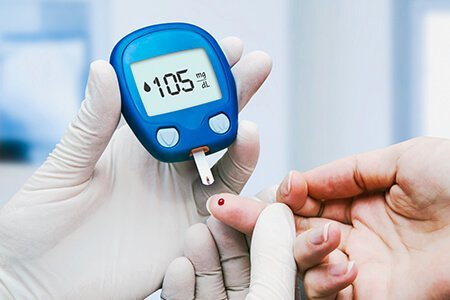

In [24]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [26]:
# Load the dataset 
diabetes_X, diabetes_y = datasets.load_diabetes(as_frame=True, return_X_y=True)


4420


In [17]:
# Use only one feature for simplicity (you can choose a different feature)
X = np.array(diabetes_X[["bmi"]]).reshape(diabetes_X.shape[0],1)
y = np.array(diabetes_y)

In [18]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [19]:
# Create a linear regression model
regr = linear_model.LinearRegression()

# Train the model
regr.fit(X_train, y_train)


LinearRegression()

In [20]:
# Make predictions on the test data
y_pred = regr.predict(X_test)


# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

Mean Squared Error: 4061.83
R-squared: 0.23


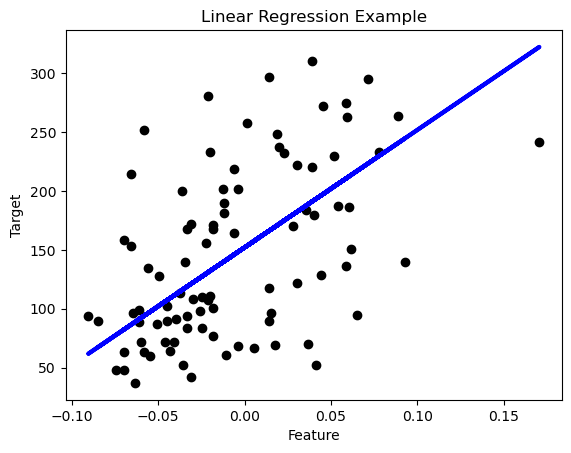

In [21]:

# Print the metrics
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

# Plot the regression line
plt.scatter(X_test, y_test, color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=3)
plt.xlabel("Feature")
plt.ylabel("Target")
plt.title("Linear Regression Example")
plt.show()

### Activity 2: Improving prediction

Inspect the diabetes dataset (use pandas frame) to decide what other variables might improve the prediction results. You can use the plot as above to see which variables are "most linear".

Include those variables and re-run the experiment. Did the results improve? Share your experience with the class.

Based in input from all groups, choose the best set of variables and re-run the experiment again.


In [12]:
# Use only one feature for simplicity (you can choose a different feature)
var_list = ["bmi","age", "bp"]
X = np.array(diabetes_X[var_list]).reshape(diabetes_X.shape[0],len(var_list))
y = np.array(diabetes_y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Create a linear regression model
regr = linear_model.LinearRegression()

# Train the model
regr.fit(X_train, y_train)

# Make predictions on the test data
y_pred = regr.predict(X_test)

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the metrics
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")


Mean Squared Error: 3756.84
R-squared: 0.29


### Activity 3: Implementing Gradient Descent for Linear Regression

Use just "bmi" variable for this activity.

Implement a simple gradient descent algorithm. Use the formulas given in lecture and the code template below. 



In [22]:
def gradient_descent(w0, w1, X_train, y_train, X_test, y_test, lr, num_epoch):
    for k in range(num_epoch):
        sum_w0 = 0
        sum_w1 = 0
        J = 0
        for i in range(0,m):
            y_hat = w0+w1*X_train[i,0]
            J = J + 1/(2*m) * (y_hat - y[i])**2
            sum_w0 = sum_w0 - lr/m * (y_hat - y_train[i])
            sum_w1 = sum_w1 - lr/m * (y_hat - y_train[i])*X_train[i,0]
        w0 = w0 + sum_w0
        w1 = w1 + sum_w1
        Y_hat = w0+w1*X_train
        Y_pred = w0+w1*X_test
    
    return w0, w1, Y_hat, Y_pred

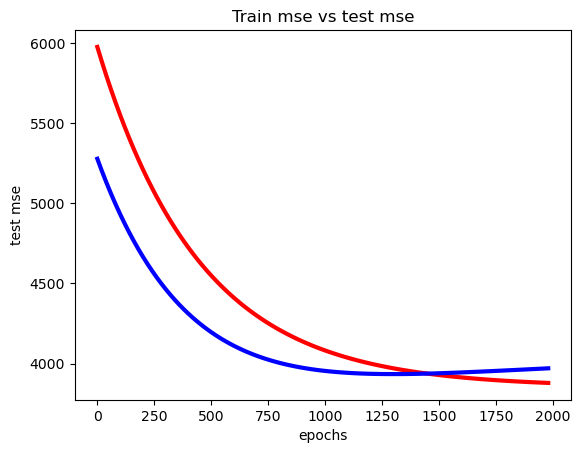

In [23]:
# initialise w0 and w1 to a random number
w0 = np.random.rand()
w1 = np.random.rand()

# Load the dataset 
diabetes_X, diabetes_y = datasets.load_diabetes(as_frame=True, return_X_y=True)

# Use only one feature for simplicity (you can choose a different feature)
X = np.array(diabetes_X[["bmi"]]).reshape(diabetes_X.shape[0],1)
y = np.array(diabetes_y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

m = X_train.shape[0]
lr = 0.5
num_epoch = 20

train_mse_list = []
test_mse_list = []

for n in range(100):
    w0, w1, Y_hat, Y_pred = gradient_descent(w0, w1, X_train, y_train, X_test, y_test, lr, num_epoch)
    
    # Calculate metrics
    train_mse = mean_squared_error(y_train, Y_hat)
    train_r2 = r2_score(y_train, Y_hat)

    test_mse = mean_squared_error(y_test, Y_pred)
    test_r2 = r2_score(y_test, Y_pred)
    
    train_mse_list.append(train_mse)
    test_mse_list.append(test_mse)
#     print(train_mse, train_r2, test_mse, test_r2)
    
# option: make a plot of these metrics vs epochs
# Plot the regression line
plt.plot(range(0, 2000, 20), train_mse_list, color='red', linewidth=3)
plt.plot(range(0, 2000, 20), test_mse_list, color='blue', linewidth=3)
plt.xlabel("epochs")
plt.ylabel("test mse")
plt.title("Train mse vs test mse")
plt.show()


### Activity 4: Experimenting with Learning Rate

Once you have established the best number of epochs to train the model, now you can choose an optimal learning rate.
Ideally we would do this together, using e.g. a grid search, but for simplicity, we just fix the number of epochs.

Use the above procedure, but fix the number of epochs to optimal and change the Learning Rate in the range 0.0 to 1 every 0.05

Answer the following questions:
1. How much you managed to improve the results by optimising the Learning Rate?
2. How the results compare with the sklearn Linear Regression model that you completed in Activity 2? Try to think why.
